# This notebook utilizes data from the whole data frame. 
        
## Table of contents:

- Rename of some of the columns to be more descriptive in the DevOps and frequency sections of the questionnaire.
- Force data to float type in **"age"**, to allow for averages when I group by other columns
- Simplify **'Ed_Level'** responses
- Force data to float type in **'Years_code'** data, some answers are not floats but strings
- Organize the **'languages used'** by exploding out the answers into single counts per mention, then counting by language 
- Simplify **'mental_health'** responses
- Explore **'mental_health'** distributions with and without the "none"
	- Most common responses (by counts of mentions)
	- Prevalence of each classification by percent 
	- Age distribution by count for each classification  
- Explore **gender** distributions for the whole group
	- By percent
- **Age** and Devops silos of negative impact table.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='qname')
df.set_index('ResponseId', inplace=True)
pd.set_option('display.max_columns',85)# applys to both df's schema and results
pd.set_option('display.max_rows',85) # applys to both df's schema and results
#df.columns
#schema_df.columns


In [2]:

#United Kingdom of Great Britain and Northern Ireland,Venezuela, Bolivarian Republic of...   Iran, Islamic Republic of...United States of America

country_list = df['Country'].unique().tolist()
country_list

country_list = df['Country'].unique().tolist()
country_replace_dict = {'United Kingdom of Great Britain and Northern Ireland':'UK of GB and N.Ireland',
 'United States of America':'USA',
 'Iran, Islamic Republic of...':'Islamic Rplb of Iran',
 'Venezuela, Bolivarian Republic of...':'Venezuela'}


df['Country'] = df['Country'].replace(country_replace_dict)
# checking it worked
#df['Country'] .value_counts() it did

In [3]:
#Adjusting column names 
df_whole = df.rename(columns = {'Knowledge_1': 'DevOP interactOutOfMyTeam.',
 'Knowledge_2': "DevOP NegImpactInfoSilos",
 'Knowledge_3': 'up-to-dateIinfo_forjob.',
 'Knowledge_4': 'enough tools resources?',
 'Knowledge_5': 'trained on tools resources?',
 'Knowledge_6': 'often repeat answer to quests',
 'Knowledge_7': 'bottelneck Waiting on answers',
 'Frequency_1': 'Freq: DevOP Need help outside of team?',
 'Frequency_2': 'Freq: DevOP interactOutOfMyTeam',
 'Frequency_3': "Freq:Encounter info silos",
 'TrueFalse_1': 'support new hires?',
 'TrueFalse_2': 'use provided learning reso?',
 'TrueFalse_3': 'Comp give time learn new skills?'})

# clean up ed_level
# change age to average
#df.head(65)

In [4]:
#Edit age

###  looking at age Distribution  ###:
# What is the data type? It is in ranges.
#df_whole['Age'].unique()
#df_whole['Age'].value_counts()

        
def change_age(age):
    if pd.isna(age):
        return np.NaN
    elif age == "Prefer not to say":
        return np.NaN
    elif age == "Under 18 years old":
        return 16
    elif age == "18-24 years old":
        return 21
    elif age == "25-34 years old":
        return 29.5
    elif age == "35-44 years old":
        return 39.5
    elif age == "45-54 years old":
        return 49.5
    elif age == "55-64 years old":
        return 55.9
    elif age == "65 years or older":
        return 70
    else:
        raise ValueError("Invalid interval value: {}".format(age))    
        
# NOTE: Overwriting ages in df_whole from ranges in to floats. This is permanant and need only run once per eval.
#       If "text Change_age already complete" appears then it has run already.


# Function to  change age, checks first if changes have been made to avoide errors.   
if all(isinstance(age, float) for age in df_whole['Age'].values):
    print("Change_age already complete")
else:df_whole.loc[:, 'Age'] = df_whole['Age'].apply(change_age)


#looking at age distribution after change, looks good
#df_whole['Age'].unique()

display(df_whole['Age'].value_counts())


# Recording participation: 
x = df_whole['Age'].count()
y = len(df_whole)

print(f'Participation in age question is: {x} / {y}')
#display(df_whole['Age'].count())



C:\Users\Adison\AppData\Local\Temp\ipykernel_8808\3633444471.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  else:df_whole.loc[:, 'Age'] = df_whole['Age'].apply(change_age)


29.5    28112
21.0    16646
39.5    13988
49.5     5281
16.0     3866
55.9     1978
70.0      554
Name: Age, dtype: int64

Participation in age question is: 70425 / 73268


In [5]:
# edit Ed_level
### Education level ###:

# Replace original education levels with simplified versions:
replace_dict = {
    'Some college/university study without earning a degree': 'Some college',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school',
    'Associate degree (A.A., A.S., etc.)':"Associate",
    'Other doctoral degree (Ph.D., Ed.D., etc.)':'Doctoral', 
    'Primary/elementary school':'Primary/Elementary', 
    'Professional degree (JD, MD, etc.)': 'Juris Doctor'
    
}

df_whole = df_whole.replace(replace_dict)


df_whole['EdLevel'].unique()
display(df_whole['EdLevel'].value_counts())

# Recording participation: 
x = df_whole['EdLevel'].count()
y = len(df_whole)

print(f'Participation in Ed Level question is: {x} / {y}')


Bachelor’s            30276
Master’s              15486
Some college           9326
Secondary school       7904
Associate              2236
Doctoral               2169
Primary/Elementary     1806
Something else         1247
Juris Doctor           1121
Name: EdLevel, dtype: int64

Participation in Ed Level question is: 71571 / 73268


In [6]:
# edit years code
###  looking at YearsCode   ###:
#df_whole['YearsCode'].unique()

# Fix data in 'years code'
# Replacing/rewriting string responses with float values:
df_whole.loc[df_whole['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0

df_whole.loc[df_whole['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51

# This is_copy = Fales is to cancel out errors/warnings I kept getting. 
df_whole.is_copy = False
#display(df_whole['YearsCode'].value_counts())

# Recording participation: 
x = df_whole['YearsCode'].count()
y = len(df_whole)

print(f'Participation in Years Code question is: {x} / {y}')


Participation in Years Code question is: 71331 / 73268


Participation in Language Have Worked With question is: 71331 / 73268


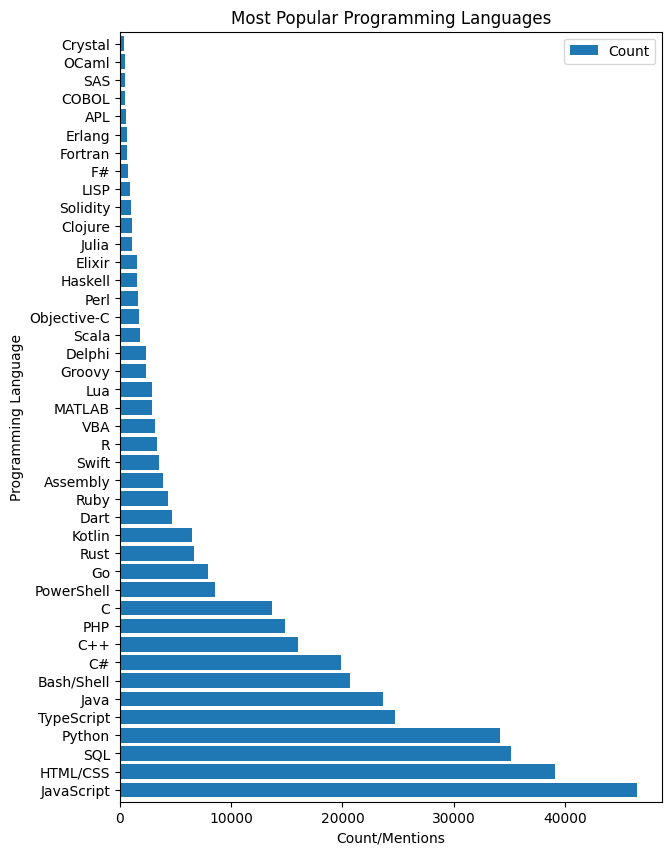

In [7]:
#looking at most used languages


# Replace ';' with ','
df_lang = df_whole

df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.replace(';', ',')

# Split the 'LanguageHaveWorkedWith' column by ',' and explode the resulting list
df_lang = df_lang.assign(LanguageHaveWorkedWith=df_whole['LanguageHaveWorkedWith'].str.split(',')).explode('LanguageHaveWorkedWith')

# Group by 'LanguageHaveWorkedWith', and count the occurrences ".size() is doing the counting in the groups"
df_lang = df_lang.groupby([ 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Sort by 'Count' in descending order
df_lang_sorted = df_lang.sort_values(by='Count', ascending=False)
df_lang_sorted

# set the index column as the x-axis
df_lang_sorted.set_index('LanguageHaveWorkedWith', inplace=True)

#df_lang_sorted.columns

# Save the DataFrame to a CSV file
df_lang_sorted.to_csv("df_lang.csv", index=True)

# plot the bar graph
df_lang_sorted.plot(kind='barh', figsize=(7,10),width=.8)

# set the title and labels for the graph
plt.title('Most Popular Programming Languages')
plt.ylabel('Programming Language')
plt.xlabel('Count/Mentions')

# display the graph
#plt.show()

# Preview the resulting dataframe
#print(df_lang_sorted.tail(75))

# Recording participation: 
#x = df_whole['LanguageHaveWorkedWith'].count()
#y = len(df_whole)

print(f'Participation in Language Have Worked With question is: {x} / {y}')


In [8]:
df_lang

,LanguageHaveWorkedWith,Count
0,APL,504
1,Assembly,3887
2,Bash/Shell,20656
3,C,13692
4,C#,19883
5,C++,16024
6,COBOL,464
7,Clojure,1070
8,Crystal,340
9,Dart,4648


After this cell I would like to look at job types.

In [9]:
df_whole['DevType'].value_counts()#- I have this someplace else wehre is it! - bottom of general demo!!!

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

In [10]:
# adjusting answers to devops questions so I can get them in percentage of content/ binary 
# Taking a look at it first
df_whole.iloc[:, 58:65]

#making a list to use for selecting multiple columns:
cols = df_whole.iloc[:, 58:65].columns.tolist()
#removeing non-comitalresponses: 
df_whole[cols] = df_whole[cols].replace({'Neither agree nor disagree': np.nan})
#changing remainder to binary of Agree or Disagree
df_whole[cols] = df_whole[cols].replace({'Strongly agree': 'Agree', 'Agree': 'Agree', 'Disagree': 'Disagree', 'Strongly disagree': 'Disagree'})

#taking another look
df_whole.iloc[:, 58:65].head(60)


,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
ResponseId,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agree,Disagree,Agree,Agree,Agree,Agree,Disagree


In [11]:
# looking at mental health distributions: 
#df['MentalHealth'].apply(lambda x: x.str.split(';').explode()) #.value_counts()

df['MentalHealth'].head(50)

# Removing Na
#df_mental = df_mental.dropna(subset=['MentalHealth'])


# make a copy of the DataFrame, that also removes unwated responses:
df_mental = df[(df['MentalHealth'].str.strip() != 'None of the above') & 
               (df['MentalHealth'].str.strip() != 'Prefer not to say') &
               (df['MentalHealth'].str.strip() != 'Or, in your own words:') &
               ((~df.MentalHealth.str.contains("Or, in your own words:").fillna(True))) ]

#df_mental_count = df_mental.dropna(subset=['MentalHealth']).count()

# Split the mult-string values in the 'MentalHealth' column by the delimiter ';':
df_mental['MentalHealth'] = df_mental['MentalHealth'].str.split(';')

# Use the explode() method to create a new row for each value in the resulting lists:
df_mental = df_mental.explode('MentalHealth')

display(df_mental['MentalHealth'].value_counts())
display(df_mental['MentalHealth'].value_counts().sum())
#display(df_mental_count[['MentalHealth']])

C:\Users\Adison\AppData\Local\Temp\ipykernel_8808\233661681.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mental['MentalHealth'] = df_mental['MentalHealth'].str.split(';')


I have a concentration and/or memory disorder (e.g., ADHD, etc.)                  6916
I have an anxiety disorder                                                        6742
I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)    6332
I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)               2775
I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                      1808
Name: MentalHealth, dtype: int64

24573

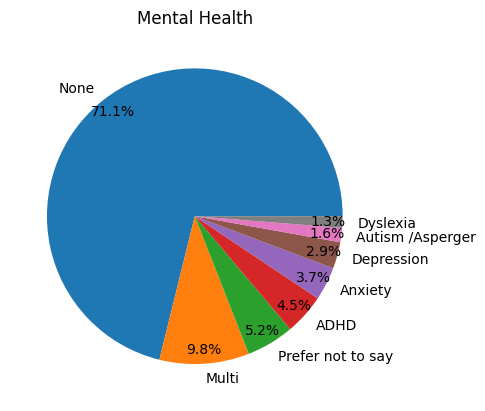

Participation in Mental Health question is: 66447 / 73268


In [12]:
# looking at mental health distributions, including "none": 
# Replace original 'MentalHealth' values with simplified versions:
# remove 'Or, in your own words:'

replace_dict = {
    'I have a concentration and/or memory disorder (e.g., ADHD, etc.)': 'ADHD',
    'I have an anxiety disorder': 'Anxiety',
    'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 'Depression',
    "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)":'Autism /Asperger',
    'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)':'Dyslexia',
    'None of the above':'None'
    }

def change_values(answer):
    # dont need this .apply() creates the for each loop for me. 
    #for answer in df['MentalHealth']:
        if type(answer) == str:
            if len(answer.split(';')) >= 2:
                return 'Multi'
            else:
                return answer
        

# Selecting all rows of DF and the column 'MentalHealth', then setting new values, this only changes the cell values that contain
#           more than one answer into the value "Multi"
df_whole.loc[:, 'MentalHealth'] = df_whole['MentalHealth'].apply(change_values)

#replaceing long answers with abr ones
df_whole['MentalHealth'] = df_whole['MentalHealth'].replace(replace_dict)
        
# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


In [13]:
df_whole['Country'] .value_counts()
########################################################################################

USA                       13543
India                      6639
Germany                    5395
UK of GB and N.Ireland     4190
Canada                     2490
                          ...  
Monaco                        1
Djibouti                      1
Seychelles                    1
Solomon Islands               1
Saint Kitts and Nevis         1
Name: Country, Length: 180, dtype: int64

In [14]:
#group by mental heath and look at some other factors
mental_health_group = df_whole.groupby(['MentalHealth'])
mental_health_group['EdLevel'].unique()
#mental_health_group['EdLevel'].value_counts().head(60)

#if I want to look at age I need to chagne the values as I did in teh General notebook.
#mental_health_group['Age'].value_counts().head(60)
#mental_health_group['Age'].mean()
# get the average

# this looks to be 50/50 for the true false. BOO
#mental_health_group['support new hires?'].value_counts().head(60)

# this looks to be about a 3rd no matter your mental health
#mental_health_group['Comp give time learn new skills?'].value_counts().head(60)
#too much to look at with out a plot
#mental_health_group['enough tools resources?'].value_counts().head(60)
#mental_health_group['enough tools resources?'].value_counts(normalize = True)[:, 'Disagree'].sort_values(ascending=False).head(60)

#looking at if certain countries have a percived level of tools

####country_group = df.groupby(['Country'])

#country_group['enough tools resources?'].value_counts(normalize = True)[:, 'Disagree'].sort_values(ascending=False).head(60)

#country_group['Gender'].value_counts(normalize = True)[:, 'Woman'].sort_values(ascending=False).head(60)


#'Gender'

MentalHealth
ADHD                      [Some college, Primary/Elementary, Bachelor’s,...
Anxiety                   [Secondary school, Bachelor’s, Master’s, Assoc...
Autism /Asperger          [Secondary school, Bachelor’s, Some college, P...
Depression                [Bachelor’s, Some college, Master’s, Associate...
Dyslexia                  [Bachelor’s, Associate, Secondary school, Some...
Multi                     [Master’s, Bachelor’s, Something else, Seconda...
None                      [Bachelor’s, Secondary school, Some college, M...
Or, in your own words:    [Master’s, Some college, Bachelor’s, Doctoral,...
Prefer not to say         [Master’s, Bachelor’s, Some college, Associate...
Name: EdLevel, dtype: object

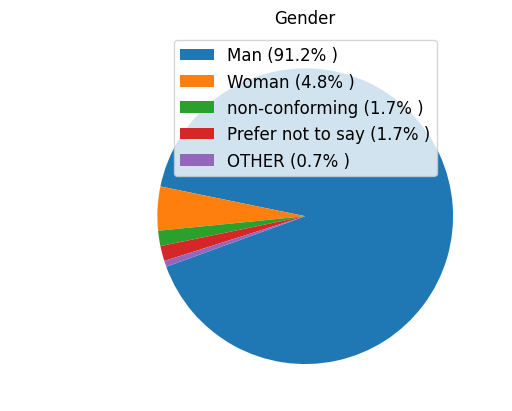

Participation in Gender question is: 70853 / 73268


<Figure size 640x480 with 0 Axes>

In [15]:
# looking at gender for the entire group:
# combining all *non-conforming into one category,*'s make it a regular expression and let me search the string'
df_whole['Gender'] = df_whole['Gender'].replace('.*non-conforming*.','non-conforming', regex=True)
# Maving in your own words into Other
df_whole['Gender'] = df_whole['Gender'].replace('.*in your own words.*|.*Or, in your own words:.*','OTHER', regex=True)


#df['Gender'] = df['Gender'].replace('.*OTHER*.','OTHER', regex=True)

gender =df_whole.value_counts('Gender')
# Get value counts without the "Man;Woman" category
gender.drop("Man;Woman", inplace=True)

# Function putting counts into percentages
percentages = []
for count in gender:
    percentage = count / sum(gender) * 100
    percentages.append(f'{percentage:.1f}% ')
    
#creating pie chart
plt.pie(gender, labels=gender.index, autopct='', startangle=200, textprops={'color': 'w', 'fontsize': 12})
plt.title('Gender')

# add percentages
plt.legend(labels=[f'{l} ({p})' for l, p in zip(gender.index, percentages)], prop={'size': 12}, loc=9)
# Move legend outside of the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#saving as image- still not working!!!
GenderSOF = plt.savefig('GenderSOF.png')

# Recording participation: 
x = df_whole['Gender'].count()
y = len(df_whole)

print(f'Participation in Gender question is: {x} / {y}')


In [16]:
![My Plot](GenderSOF.png)

'[My' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
df_whole.columns
# can I group by age look at dev op slice
age_group = df_whole.groupby(['Age'])
age_group[ 'DevOP NegImpactInfoSilos'].value_counts(normalize = True)[:, 'Agree']
#age_group['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos','up-to-dateIinfo_forjob.', 'enough tools resources?','trained on tools resources?', 'often repeat answer to quests','bottelneck Waiting on answers'].value_counts(normalize = True)
    
#mental_health_group['EdLevel'].value_counts().head(60)

Age
16.0    0.346154
21.0    0.520087
29.5    0.573319
39.5    0.604533
49.5    0.577810
55.9    0.560606
70.0    0.390805
Name: DevOP NegImpactInfoSilos, dtype: float64

In [18]:
def get_grouped_df(df, groupby_column, columns_to_group):
    # Create a new dataframe to store the grouped values
    grouped_df = pd.DataFrame(columns=columns_to_group)

    # Group the data by the specified column
    grouped = df.groupby(groupby_column)

    # Loop over each column to group
    for col in columns_to_group:
        # Get the value counts for each group and normalize the values
        counts = grouped[col].value_counts(normalize=True)[:, 'Agree']
        # Add the counts to the new dataframe
        grouped_df[col] = counts

    # Reset the index of the new dataframe
    grouped_df = grouped_df.reset_index()

    return grouped_df

In [19]:
def highlight_min_max(column):
    """
    Highlight the maximum and minimum values in a Pandas series
    """
    # find the maximum and minimum values in the series
    max_val = column.max()
    min_val = column.min()

    # create an empty list to store the style information for each value
    styles = []
    for value in column:
        # if the value is the maximum, add the 'max' style to the list
        if value == max_val:
            styles.append('background-color: blue; color: white')
        # if the value is the minimum, add the 'min' style to the list
        elif value == min_val:
            styles.append('background-color: red; color: white')
        # if the value is neither the maximum nor minimum, add an empty style to the list
        else:
            styles.append('')
    # return a Series of style information for each value in the input series
    return pd.Series(styles, index=column.index)

In [20]:

grouped_df_age = get_grouped_df(df_whole, 'Age', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])

grouped_df_age.style.apply(highlight_min_max)


,Age,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,16.000000,0.785714,0.346154,0.703704,0.888889,0.918033,0.571429,0.703704
1,21.000000,0.866084,0.520087,0.739981,0.847398,0.914604,0.658683,0.747561
2,29.500000,0.908650,0.573319,0.718899,0.809727,0.887272,0.673400,0.698870
3,39.500000,0.933409,0.604533,0.713649,0.784379,0.870647,0.697035,0.686883
4,49.500000,0.937405,0.577810,0.709126,0.802708,0.880492,0.712963,0.683827
5,55.900000,0.930905,0.560606,0.696486,0.798206,0.870370,0.694885,0.694669
6,70.000000,0.925926,0.390805,0.782051,0.857143,0.960784,0.757143,0.597561


In [21]:
grouped_df_mental = get_grouped_df(df_whole, 'MentalHealth', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])



# apply the function to the DataFrame and display it
grouped_df_mental.style.apply(highlight_min_max)

,MentalHealth,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,ADHD,0.912143,0.582975,0.696729,0.784021,0.848980,0.689655,0.760069
1,Anxiety,0.885618,0.580348,0.673287,0.781655,0.861811,0.699050,0.742164
2,Autism /Asperger,0.897849,0.589905,0.686520,0.720365,0.837079,0.585987,0.723724
3,Depression,0.870690,0.565107,0.644993,0.743725,0.825416,0.669799,0.709184
4,Dyslexia,0.932468,0.591362,0.726444,0.746224,0.853801,0.720779,0.748428
5,Multi,0.878567,0.613897,0.650061,0.716814,0.819005,0.708537,0.761268
6,None,0.919920,0.559533,0.738509,0.830887,0.905174,0.676271,0.681883
7,"Or, in your own words:",0.892430,0.654450,0.666667,0.798995,0.859813,0.696682,0.741627
8,Prefer not to say,0.896730,0.641509,0.686047,0.773404,0.858128,0.686059,0.747881


In [22]:
grouped_df_ed = get_grouped_df(df_whole, 'EdLevel', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])



grouped_df_ed

# apply the function to the DataFrame and display it
grouped_df_ed.style.apply(highlight_min_max)


,EdLevel,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,Associate,0.907480,0.594238,0.696827,0.785227,0.883996,0.693168,0.734982
1,Bachelor’s,0.910499,0.580601,0.724273,0.811860,0.884594,0.688795,0.717061
2,Doctoral,0.927043,0.604450,0.687023,0.803970,0.883372,0.639842,0.607595
3,Juris Doctor,0.890196,0.546875,0.761021,0.850780,0.916143,0.736585,0.728180
4,Master’s,0.921228,0.580620,0.723591,0.800875,0.883460,0.663360,0.680043
5,Primary/Elementary,0.830688,0.523810,0.712418,0.813665,0.861272,0.723684,0.694268
6,Secondary school,0.886755,0.517617,0.681782,0.809414,0.899076,0.680369,0.697767
7,Some college,0.905586,0.534511,0.716591,0.815905,0.895241,0.678595,0.697145
8,Something else,0.891720,0.607438,0.687747,0.817121,0.889286,0.724576,0.749035


In [23]:


grouped_df_Gender = get_grouped_df(df_whole, 'Gender', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])

# set the "Gender" column as the index of the dataframe
grouped_df_Gender.set_index('Gender', inplace=True)

# drop the "Man;Woman" row from the index
grouped_df_Gender.drop("Man;Woman", inplace=True)


# apply the function to the DataFrame and display it
grouped_df_Gender.style.apply(highlight_min_max)

#print(grouped_df_gender.columns)

,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
Gender,,,,,,,
Man,0.913457,0.571106,0.721211,0.812123,0.889645,0.682479,0.702432
OTHER,0.843537,0.583333,0.632000,0.798450,0.860294,0.692982,0.672269
Prefer not to say,0.900621,0.662835,0.678571,0.755102,0.830986,0.661417,0.704120
Woman,0.885463,0.572770,0.720965,0.786305,0.867763,0.661251,0.693487
non-conforming,0.888646,0.626943,0.669468,0.730028,0.815000,0.651811,0.714286


In [24]:
countries = ['USA','India','Germany','UK of GB and N.Ireland','Canada','France','Brazil','Poland','Netherlands','Spain','Italy','Australia','Russian Federation','Turkey','Sweden','Switzerland','Austria','Israel','Islamic Rplb of Iran','Pakistan','Czech Republic','China','Belgium','Bangladesh','Ukraine','Romania','Mexico','Portugal','Greece','Denmark','Indonesia','Argentina','Nigeria','South Africa','Norway','Finland','Hungary','New Zealand','Egypt','Philippines','Bulgaria','Colombia','Japan','Ireland','Viet Nam']
filt2 = df['Country'].isin(countries)
df_whole_45_dev = df_whole[filt2]
df_whole_45_dev.columns
df_whole_45_dev['Country'].value_counts()



USA                       13543
India                      6639
Germany                    5395
UK of GB and N.Ireland     4190
Canada                     2490
France                     2328
Brazil                     2109
Poland                     1732
Netherlands                1555
Spain                      1521
Italy                      1514
Australia                  1462
Russian Federation         1229
Sweden                     1020
Turkey                     1020
Switzerland                 932
Austria                     833
Israel                      795
Islamic Rplb of Iran        723
Pakistan                    711
Czech Republic              692
China                       632
Belgium                     626
Bangladesh                  613
Ukraine                     593
Romania                     581
Mexico                      574
Portugal                    563
Greece                      548
Denmark                     547
Indonesia                   537
Argentin

In [25]:


grouped_df_country = get_grouped_df(df_whole_45_dev, 'Country', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])

# set the "country" column as the index of the dataframe
grouped_df_country.set_index('Country', inplace=True)

# drop the "Man;Woman" row from the index
#grouped_df_country.drop("Man;Woman", inplace=True)


# apply the function to the DataFrame and display it
grouped_df_country.style.apply(highlight_min_max)

#print(grouped_df_gender.columns)

,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
Country,,,,,,,
Argentina,0.924303,0.566327,0.712195,0.840796,0.925311,0.810000,0.750000
Australia,0.929853,0.558594,0.714575,0.780287,0.875926,0.668803,0.702041
Austria,0.932749,0.520147,0.707143,0.796491,0.901961,0.606618,0.619377
Bangladesh,0.910256,0.603261,0.794393,0.881279,0.939655,0.839378,0.772973
Belgium,0.934156,0.523316,0.727273,0.805970,0.901408,0.604520,0.671717
Brazil,0.920942,0.605619,0.740413,0.799597,0.889302,0.709147,0.753036
Bulgaria,0.928571,0.401639,0.776978,0.865248,0.932099,0.641791,0.617188
Canada,0.910959,0.602371,0.732200,0.778959,0.856582,0.663647,0.709883
China,0.873171,0.596386,0.788360,0.900000,0.948837,0.682635,0.630682


In [26]:
df_whole_45_dev.columns

#'MentalHealth'

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [27]:
grouped_df_country2 = df_whole_45_dev.groupby(['Country'])
grouped_df_country2['MentalHealth'].value_counts(normalize = True).head(45)

# Calculate the value counts for each MentalHealth label per Country
count_df = grouped_df_country2['MentalHealth'].value_counts().unstack(fill_value=0)

# Reset the index to convert Country from index to a column
count_df = count_df.reset_index()


# Set "Country" as the index of the DataFrame
count_df = count_df.set_index('Country')

# Calculate the sum of values for each country
country_sums = count_df.sum(axis=1)

# Normalize the values in each column based on the country sums and multiply by 100
normalized_df = count_df.div(country_sums + 1e-9, axis=0) * 100


# Format the normalized values with two decimal places and include the percent symbol
#normalized_df = normalized_df.applymap("{:.2f}%".format)

# Round the values to a specified number of decimal places
decimal_places = 2  # Specify the number of decimal places you want to keep
normalized_df = normalized_df.round(decimal_places)

# Print the normalized DataFrame
#print(normalized_df)


# apply the function to the DataFrame and display it
normalized_df.style.apply(highlight_min_max)


MentalHealth,ADHD,Anxiety,Autism /Asperger,Depression,Dyslexia,Multi,None,"Or, in your own words:",Prefer not to say
Country,,,,,,,,,
Argentina,2.440000,4.070000,0.610000,2.240000,0.410000,4.270000,79.470000,1.220000,5.280000
Australia,4.680000,4.170000,2.850000,2.780000,0.800000,11.850000,67.080000,0.950000,4.830000
Austria,3.680000,1.710000,0.790000,2.760000,0.920000,5.130000,78.290000,0.790000,5.920000
Bangladesh,2.930000,3.850000,0.180000,2.930000,1.470000,6.780000,73.810000,0.180000,7.880000
Belgium,3.940000,2.230000,3.770000,1.710000,3.250000,9.760000,68.660000,2.050000,4.620000
Brazil,4.330000,8.260000,1.440000,2.840000,0.350000,15.230000,63.760000,0.900000,2.890000
Bulgaria,1.470000,3.540000,0.290000,1.770000,0.590000,5.010000,84.660000,0.590000,2.060000
Canada,6.930000,4.370000,1.130000,2.940000,0.780000,13.600000,63.750000,0.610000,5.890000
China,2.740000,3.470000,0.730000,2.740000,1.460000,5.470000,73.720000,0.550000,9.120000


In [28]:
### not working I give upf or the night!!!!!
df_whole.dropna(subset=['YearsCode'], inplace=True)
df_whole['YearsCode'].value_counts()



10    5217
5     5193
6     4651
4     4480
7     4237
8     4227
3     4122
2     3351
12    2995
15    2962
20    2659
9     2581
11    1819
14    1811
13    1624
25    1582
1     1566
0     1413
16    1406
30    1330
22    1176
18    1150
17    1080
40     777
24     752
35     742
23     644
19     563
26     489
27     485
21     483
28     425
32     371
38     288
37     277
34     241
36     236
33     229
42     216
29     208
51     172
31     170
45     167
39     159
41     143
43     115
44     104
50      68
46      57
47      42
48      41
49      35
Name: YearsCode, dtype: int64

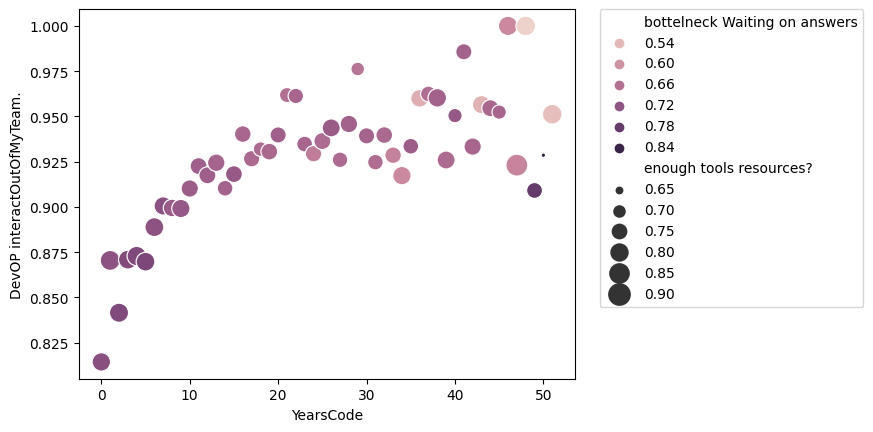

In [29]:
### not working I give up for the night!!!!!
df_whole.dropna(subset=['YearsCode'], inplace=True)

#tring to change data type to int
#grouped_df_YearsCode['YearsCode'].apply(type).value_counts()
#df_whole['YearsCode'] = df_whole['YearsCode'].astype('Int64') ---NOPE!!!
df_whole['YearsCode'] = pd.to_numeric(df_whole['YearsCode'], errors='coerce').astype('Int64')

grouped_df_YearsCode = get_grouped_df(df_whole, 'YearsCode', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])
# SORTING BY YEARS CODE
grouped_df_YearsCode.sort_values('YearsCode')

# set the "YearsCode" column as the index of the dataframe
#grouped_df_YearsCode.set_index('YearsCode', inplace=True)

#grouped_df_YearsCode
# apply the function to the DataFrame and display it
#grouped_df_YearsCode.style.apply(highlight_min_max)
#grouped_df_YearsCode

## Turn this in to a few scatter plots instead:
sns.scatterplot(x = "YearsCode", y = 'DevOP interactOutOfMyTeam.', data = grouped_df_YearsCode, hue = 'bottelneck Waiting on answers', size = 'enough tools resources?',sizes=(10, 250) )

# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [30]:
# Define a slice of columns to count non-NA responses for
columns_to_count = ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers','YearsCode']

# Count non-NA responses for each column in the slice
counts = df_whole[columns_to_count].notna().sum()

# Print the counts for each column
print(counts)

DevOP interactOutOfMyTeam.       32521
DevOP NegImpactInfoSilos         25564
up-to-dateIinfo_forjob.          26504
enough tools resources?          27110
trained on tools resources?      29020
often repeat answer to quests    25181
bottelneck Waiting on answers    26057
YearsCode                        71331
dtype: int64


In [31]:
# Define a slice of columns to count non-NA responses for
columns_to_count = ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers']

# Remove NaN values from the slice of columns
cleaned_df = df_whole[columns_to_count].dropna()

# Count non-NA responses for each column in the cleaned DataFrame
counts = cleaned_df.notna().sum()

# Print the counts for each column
print(counts)

DevOP interactOutOfMyTeam.       8104
DevOP NegImpactInfoSilos         8104
up-to-dateIinfo_forjob.          8104
enough tools resources?          8104
trained on tools resources?      8104
often repeat answer to quests    8104
bottelneck Waiting on answers    8104
dtype: int64


I think it is very important to remember that the quality of this data is sparatic/ varible at best. If we remove the responses where any portion is NA, from the DEvops section of the data we see our participation drops from 26000/71000 to 8100/71000. Meaning that the corrolations drawn/ observed between the asnwers to these questions are infered not proven. 

In [32]:
#count the number of NaN values in each column

nan_counts = df_whole.isna().sum()

# Sort the counts in ascending order
nan_counts_sorted = nan_counts#.sort_values(ascending=False)

# Print the sorted counts for each column
print(nan_counts_sorted)

MainBranch                                    0
Employment                                   51
RemoteWork                                12670
CodingActivities                          12721
EdLevel                                     127
LearnCode                                    94
LearnCodeOnline                           20838
LearnCodeCoursesCert                      42049
YearsCode                                     0
YearsCodePro                              19579
DevType                                   10278
OrgSize                                   20493
PurchaseInfluence                         20560
BuyNewTool                                 3636
Country                                       0
Currency                                  20345
CompTotal                                 32982
CompFreq                                  27044
LanguageHaveWorkedWith                      738
LanguageWantToWorkWith                     4633
DatabaseHaveWorkedWith                  

In [33]:
# Count the number of NaN values in each row of the DataFrame
nan_counts = df_whole.isna().sum(axis=1)

# Get the value counts of the NaN counts and sort by the NaN counts
nan_counts_sorted = nan_counts.value_counts().sort_index(ascending=False)

# Print the sorted value counts
print(nan_counts_sorted)


71       1
69       1
68       1
67       1
66       4
65       3
64       3
63       4
62       8
61       6
60       9
59      11
58      16
57      26
56      25
55      42
54      68
53     107
52     136
51     163
50     240
49     316
48     430
47     512
46     678
45     744
44     851
43     948
42    1069
41    1139
40    1198
39    1419
38    1457
37    1524
36    1524
35    1626
34    1651
33    1727
32    1643
31    1612
30    1555
29    1583
28    1419
27    1547
26    1591
25    1628
24    1562
23    1219
22     842
21     631
20     426
19     536
18     687
17     851
16    1076
15    1332
14    1595
13    1861
12    2191
11    2378
10    2660
9     2986
8     3259
7     3358
6     3312
5     2752
4     1977
3     1174
2      400
dtype: int64


In [34]:
#survey_group = df_whole.groupby(['SurveyLength'])

df_whole.value_counts(['SurveyLength'])


SurveyLength         
Appropriate in length    53693
Too long                 14368
Too short                 2045
dtype: int64

In [35]:
df_whole.value_counts(['SurveyEase'])

SurveyEase                
Easy                          47711
Neither easy nor difficult    21492
Difficult                       979
dtype: int64

In [36]:
# Filter the rows where the response to 'SurveyLength' is 'Appropriate in length' and 'SurveyEase' is 'Easy'
filtered_df = df_whole[(df_whole['SurveyLength'] == 'Appropriate in length') & (df['SurveyEase'] == 'Easy')]

# Print the filtered DataFrame
filtered_df.shape   ## answer is (38466, 78) 78/2 =36 and 38466/2 = 19,233

# Count the number of NaN values in each row of the DataFrame
nan_counts_filtered = filtered_df.isna().sum(axis=1)

# Get the value counts of the NaN counts and sort by the NaN counts
nan_counts_sorted_filtered = nan_counts_filtered.value_counts().sort_index(ascending=False)

# Print the sorted value counts
print(nan_counts_sorted_filtered)



C:\Users\Adison\AppData\Local\Temp\ipykernel_8808\3675431671.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_whole[(df_whole['SurveyLength'] == 'Appropriate in length') & (df['SurveyEase'] == 'Easy')]


58       1
57       2
56       1
55       5
54      18
53      19
52      36
51      61
50      93
49     146
48     207
47     248
46     324
45     374
44     439
43     529
42     562
41     634
40     660
39     783
38     835
37     866
36     834
35     946
34     966
33     977
32     937
31     892
30     874
29     903
28     801
27     918
26     955
25     989
24     953
23     717
22     459
21     284
20     160
19     203
18     277
17     341
16     472
15     638
14     745
13     937
12    1092
11    1194
10    1375
9     1595
8     1776
7     1895
6     1867
5     1602
4     1148
3      675
2      226
dtype: int64


The cell below shows that only half of the individuals who stated that the test was both easy and Appropriate in length finished 2/3rds or more of the test

In [37]:
# Initialize the cumulative sum and the key
cumulative_sum = 0
key = None

# Iterate over the items in the Series
for k, v in nan_counts_sorted_filtered.items():
    # Add the current value to the cumulative sum
    cumulative_sum += v
    # Set the key to the current index
    key = k
    # Check if the cumulative sum has reached 19,233
    if cumulative_sum >= 19233:
        # If so, break out of the loop
        break

# Print the key that corresponds to the sum of 19,233 NaNs
print(f"Key with 19,233 NaNs: {key}")


Key with 19,233 NaNs: 23


In [39]:
# Save the DataFrame to a CSV file
df_whole.to_csv("df_whole.csv", index=False)
# Save the DataFrame to a CSV file
df_whole_45_dev.to_csv('df_whole_45_dev.csv')